# key words
- model selection: cross_val_score
- regressor: GaussianProcessRegressor

d:\Miniconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.77075703e+01,  1.04289922e-04]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 71, 'nit': 17, 'warnflag': 2}
  ConvergenceWarning)


List of scores: [ -3.72102867  -6.07375287  -3.51558819 -15.38087736]
Mean of scores: -7.172811771803442
Std of scores: 4.844335923008141
List of scores: [ -3.47296092  -5.29659653  -3.54837242 -15.15327169]
Mean of scores: -6.867800388874782
Std of scores: 4.838937213933347
List of scores: [ -4.21707073  -8.19432724  -3.54353336 -16.76123546]
Mean of scores: -8.179041696913487
Std of scores: 5.264015454931003


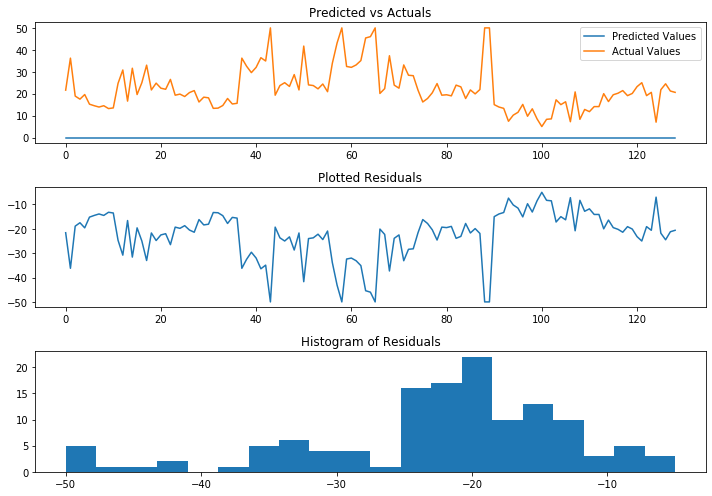

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn import impute, pipeline, decomposition

from sklearn.model_selection import cross_val_score

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as CK

def score_mini_report(scores_list):
    print("List of scores:", scores_list)
    print("Mean of scores:", scores_list.mean())
    print("Std of scores:", scores_list.std())


boston = datasets.load_boston()
X = boston.data
y = boston.target
train_set = np.random.choice([True, False], len(y), p=[.75, .25])
X_train, X_test = X[train_set], X[~train_set]
y_train, y_test = y[train_set], y[~train_set]

mixed_kernel = CK(1.0, (1e-4, 1e4)) * RBF(10, (1e-4, 1e4))
gpr_5 = GaussianProcessRegressor(alpha=5, n_restarts_optimizer=20, kernel=mixed_kernel)
scores_5 = cross_val_score(gpr_5, X_train, y_train, cv=4, scoring='neg_mean_absolute_error')
score_mini_report(scores_5)

gpr_7 = GaussianProcessRegressor(alpha=7, n_restarts_optimizer=20, kernel=mixed_kernel)
scores_7 = cross_val_score(gpr_7, X_train, y_train, cv=4, scoring='neg_mean_absolute_error')
score_mini_report(scores_7)

gpr_7n = GaussianProcessRegressor(alpha=7, n_restarts_optimizer=20, kernel=mixed_kernel, normalize_y=True)
scores_7n = cross_val_score(gpr_7n, X_train, y_train, cv=4, scoring='neg_mean_absolute_error')
score_mini_report(scores_7n)

y_pred = gpr_7n.predict(X_test)

plt.figure(figsize=(10, 7), tight_layout=True)

plt.subplot(3, 1, 1, title="Predicted vs Actuals")
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
plt.plot(range(len(y_pred)), y_test, label='Actual Values')
plt.legend(loc='best')

plt.subplot(3, 1, 2, title="Plotted Residuals")
plt.plot(range(len(y_pred)), y_pred - y_test)

plt.subplot(3, 1, 3, title="Histogram of Residuals")
plt.hist(y_pred - y_test, bins=20)

plt.show()